In [1]:
import csv
%matplotlib nbagg
from collections import defaultdict
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
#import itertools
#from IPython.core.debugger import Tracer
#Tracer()() #this one triggers the debugger


In [2]:

#year,eco,kind,count,outof,proportion
#1970,Rubygems,release,1,1,1.0
#1970,Rubygems,same,0,1,0.0
#1970,Rubygems,backport,0,1,0.0
#1970,Ruby
import os; print os.getcwd()
rels = csv.DictReader(open("../data/laptop/releases.csv"))
release_d = defaultdict(dict)   # release freq by year and ecosystem
majors = defaultdict(dict)      # major rel freq by year and eco
for r in rels:
    if r["kind"] == "release" and r["eco"] != "Packagist":
        release_d[r["year"]][r["eco"]] = float(r["proportion"])
    elif r["kind"] == "major":
        majors[r["year"]][r["eco"]] = float(r["proportion"])

# major release RATIO by year and eco
major_ratio_d = {y: { e: majors[y][e]/release_d[y][e] for e in release_d[y] } for y in release_d }

# [{year,eco1,eco2,eco3...}] release frequencies by ecosystem
releases = [dict([("year",int(y))] + release_d[y].items()) for y in sorted(release_d.keys()) if y > "1996" and y<"2018"]
# [{year,eco1,eco2,eco3...}] major release ratios by ecosystem
major_ratios = [dict([("year",int(y))] + major_ratio_d[y].items()) for y in sorted(major_ratio_d.keys()) if y > "1996" and y<"2018"]


/Users/bogart-MBP-isri/Dropbox/research/dev-migration/scripts


<IPython.core.display.Javascript object>


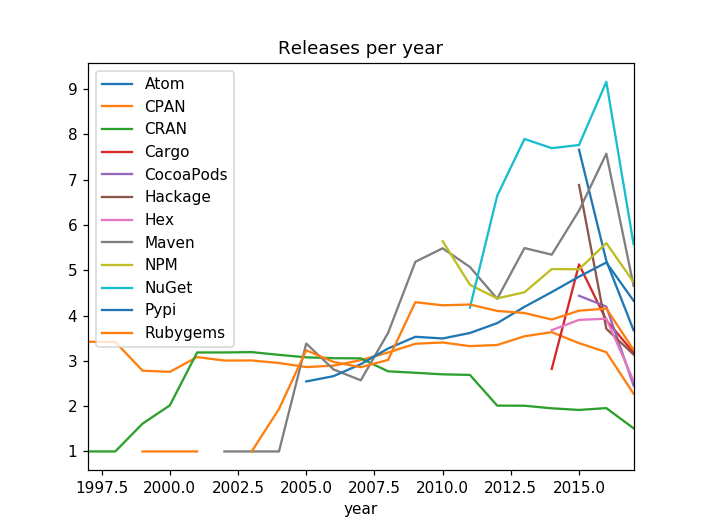

In [3]:
#preleasesrep = [dict(prax.get(y,{}).items()+[("year",str(y))]) for y in range(minyr, maxyr)]
    
df = pd.DataFrame.from_dict(releases)
df.set_index("year",drop=True,inplace=True)
#plt.figure().subplots_adjust(right=0.8)
df.plot.line(title="Releases per year")#.legend(loc=1, bbox_to_anchor=(1,0)) #1.2, 0.5))


<IPython.core.display.Javascript object>


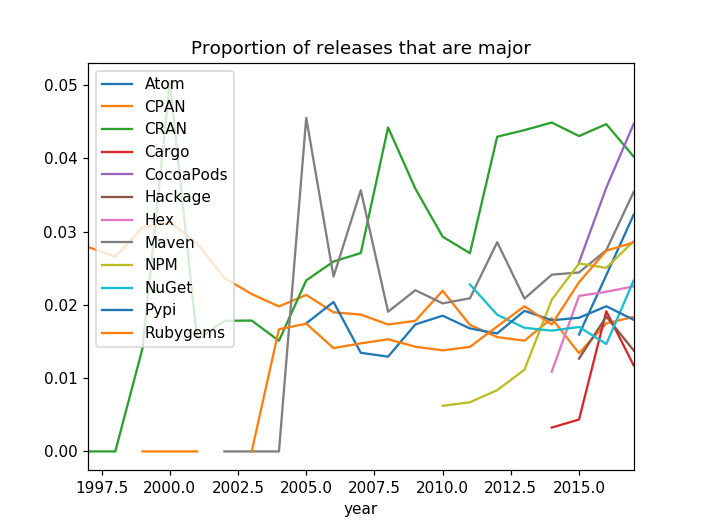

In [4]:
df = pd.DataFrame.from_dict(major_ratios)
df.set_index("year",drop=True,inplace=True)
df.plot.line(title="Proportion of releases that are major")

In [5]:
#../data/laptop/pkg_releases.csv
#year,eco,kind,package,count
#1970,Rubygems,release,nakilon,1


In [6]:
print os.getcwd()
from os import listdir
from os.path import isfile, join
atf = "../data/libraries"  # data/libraries/
onlyfiles = [f for f in listdir(atf) if isfile(join(atf, f))]
print onlyfiles

rels = csv.DictReader(open("../data/libraries/pkg_releases.csv"))
hists = defaultdict(lambda: defaultdict(list))    # *list* of all counts per year/eco for stats
hists_detail = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int))))   # all stats for all packages
for r in rels:
    if r["kind"] == "release":
        hists[r["year"]][r["eco"]].append({"count": int(r["count"])})
    hists_detail[r["year"]][r["eco"]][r["package"]][r["kind"]] = int(r["count"])
    

        



/Users/bogart-MBP-isri/Dropbox/research/dev-migration/scripts
['pkg_releases.csv', 'releases.csv']


In [7]:
#calc major ratio adding to hists_detail
for y in hists_detail:
    for eco in hists_detail[y]:
        for pk in hists_detail[y][eco]:
            if "release" in hists_detail[y][eco][pk]:
                hists_detail[y][eco][pk]["major_ratio"] = \
                     hists_detail[y][eco][pk]["major"]*1.0/hists_detail[y][eco][pk]["release"]

                

In [8]:
def applie(preframe, transf=lambda q:q, filt=lambda q: True):
    return [{"count": transf(p["count"])} for p in preframe if filt(p["count"])]


In [9]:
def cap(preframe, maxval): 
    return applie(preframe, filt=lambda q:q<maxval)
def plog(preframe):
    return applie(preframe, transf=math.log)

In [10]:
tester = [{"count":4.0},{"count":5.0}]
#print cap(tester, 4.5)
def t1(q): return q+1.0
print applie(tester, transf=t1)
print applie(tester, filt=lambda q: q>4.5)

[{'count': 5.0}, {'count': 6.0}]
[{'count': 5.0}]


In [1]:
pd.DataFrame(hists["2015"]["CRAN"]).plot.hist(title="2015 CRAN distribution of release frequencies", bins=range(1,15,1))

NameError: name 'pd' is not defined

In [12]:
def df(yr,eco,measure):
    return pd.DataFrame([hists_detail[yr][eco][p][measure] for p in hists_detail[yr][eco]], columns=["count"])
def df_rels(yr,eco,measure):
    return pd.DataFrame([hists_detail[yr][eco][p][measure] for p in hists_detail[yr][eco] 
                         if hists_detail[yr][eco][p]["release"] > 1.0], columns=["count"])
def plothist(yr,eco,measure,title):
    return df(yr,eco,measure).plot.hist(title=title,bins=30)

#plothist("2016","NPM","major_ratio","2016 NPM distribution of major release ratios")
#df("2016","NPM","major_ratio").plot.hist(title="2016 npm major ratio",bins=30)
q = df_rels("2015","NPM","major_ratio")
q.plot.hist(title="NPM major ratio 2015",bins=30)
plt.gca().set_yscale("log")
#q.loc[(q["count"] > 0.0) & (q["count"] < 1.0)].plot.hist(title="NPM major ratio 2015",bins=30)
#from collections import Counter
#Counter(q["count"])

<IPython.core.display.Javascript object>

In [13]:
pd.DataFrame(cap(hists["2013"]["NuGet"], 100.0)).plot.hist(bins=80, title="2015 NuGet distribution of releases per year")
plt.gca().set_yscale("log")

<IPython.core.display.Javascript object>

In [14]:
pd.DataFrame(cap(hists["2013"]["NuGet"],600.0)).plot.hist(bins=100)
plt.gca().set_yscale("log")

<IPython.core.display.Javascript object>

In [15]:
print "NuGet = brown, NPM = orange"
ax=pd.DataFrame((cap(hists["2015"]["NuGet"],100.0))).plot.hist(bins=100, alpha=.5, title="NuGet=brown, NPM=orange")
plt.gca().set_yscale("log")
pd.DataFrame((cap(hists["2015"]["NPM"],100.0))).plot.hist(bins=100, ax=ax, alpha = .5)
plt.gca().set_yscale("log")

NuGet = brown, NPM = orange


<IPython.core.display.Javascript object>

In [16]:
print len(repo_include["2015"])
print len(hist_npm_nuget["2015"])



NameError: name 'repo_include' is not defined

In [ ]:
#host,repo,ecosystem,packageID,packageName
#Bitbucket,davidcsejtei_wp-tooler,Packagist,1478617,davidcsejtei/davidcsejtei-wp-lib

#
repomap = defaultdict(dict)   # eco -> package -> repo
repomapr = defaultdict(dict)   # eco -> repo -> any one package

repomapf = csv.DictReader(open("../data/common/pkg-repo-map.csv"))
for rmf in repomapf:
    repomap[rmf["ecosystem"]][rmf["packageName"]] = rmf["repo"]
    if rmf["repo"] not in repomapr[rmf["ecosystem"]]:
        repomapr[rmf["ecosystem"]][rmf["repo"]] = rmf["packageName"]
    

In [ ]:
rels = csv.DictReader(open("../data/laptop/npm_nuget_infl.csv"))
hist_npm_nuget = defaultdict(list)   # for each year, unindexed list of influence values
repo_include = defaultdict(list)  # for each year, list of high-influence repos
kount = 0
for r in rels:
    kount += 1
    if kount % 10000 == 0: print kount,
    hist_npm_nuget[r["year"]].append({"count": int(r["influence"])})
    if int(r["influence"]) > 1000: repo_include[r["year"]].append(r["package"])


In [ ]:
#ri = dict()
#for yr in repo_include:
#    ri[yr] = [r for r in repo_include[yr] if hists_detail[yr][eco][repomapr[eco][r]]["releases"] > 1]
#repo_include = ri

In [ ]:
measure = "release"
eco = "NuGet"
#print "Removing low-release packages"


hists_included = {}
hists_excluded = {}
hists_random = {}
counts = defaultdict(int)
for yr in hists_detail:
    hists_included[yr] = []
    hists_random[yr] = []
    hists_excluded[yr] = []
    for p in hists_detail[yr][eco]:
        #print "Checking", p, repomap[eco].get(p,"(not found)")
        if repomap[eco].get(p,"") in repo_include[yr]:
            hists_included[yr].append({"count":hists_detail[yr][eco][p].get(measure,0)})
        elif repomap[eco].get(p,"")  not in repo_include[yr]:
            hists_excluded[yr].append({"count":hists_detail[yr][eco][p].get(measure,0)})
        if random.randint(0,20) == 1:
            hists_random[yr].append({"count":hists_detail[yr][eco][p].get(measure,0)})
        counts[yr] += hists_detail[yr][eco][p].get(measure,0)
            

In [ ]:
yr='2015'
x = pd.DataFrame([v["count"] for v in cap(hists_included[yr],50.0)])
y = pd.DataFrame([v["count"] for v in cap(hists_excluded[yr],50.0)])
z = pd.DataFrame([v["count"] for v in cap(hists_random[yr],50.0)])

#kde
fig = plt.figure()
ax = fig.add_subplot(111)
print "Histogram of", measure," per year in",yr,"in ",eco," packages, with/without NPM influence"
ax1 = x.plot(kind='kde', ax=ax, label="influenced", alpha=.3)
ax1.set_xscale("log")
y.plot(kind='kde', ax=ax1, color='red', label="uninfluenced", alpha=.3)
z.plot(kind='kde', ax=ax1, color='green', label="random", alpha=.3)
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, ["influenced","uninfluenced","random"], loc='best') 
print "Influenced", len(hists_included[yr])
print "uninfluenced", len(hists_excluded[yr])
print "Random", len(hists_random[yr])

In [ ]:
{z[0][v]:sum([1 for k in x[0] if k==x[0][v]]) for v in x[0]}

In [ ]:
for yr in sorted(repo_include):
    print yr, len(repo_include[yr]), counts[yr], 100.0*len(repo_include[yr])/ counts[yr] if counts[yr] > 0 else "x"

In [ ]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

for y in sorted(hists.keys()):
    print y
    print "Overall", mean([k["count"] for k in hists[y]["NuGet"]])
    print "Influenced", mean([k["count"] for k in hists_included[y]])

In [ ]:
hist_ms_included = defaultdict(list)
hist_ms_excluded = defaultdict(list)
hist_ms_random = defaultdict(list)
counts = defaultdict(int)
kount = 0
seen = set()
for p in hist_
for r in rels:
    kount += 1
    #if kount % 10000 == 0: print kount,
    if r["kind"] == "release":
        # TODO: I think fails because we need a package lookup
        repo = repomap["NuGet"].get(r["package"],"")
        if repo in seen: 
            continue
        seen.add(repo)
        if repomap["NuGet"].get(r["package"],"") in repo_include[r["year"]]:
            if int(r["count"]) == 22: print r["year"], r["package"], r["count"], repomap["NuGet"][r["package"]]
            hist_ms_included[r["year"]].append({"count": int(r["count"])})
        else:
            hist_ms_excluded[r["year"]].append({"count": int(r["count"])})
        
        if random.randint(0,30)==1:
            hist_ms_random[r["year"]].append({"count": int(r["count"])})
        counts[r["year"]] += 1
